## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [ ]:
!nvidia-smi

Sun Sep 17 10:11:27 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install Grounding DINO 🦕

In [ ]:
%cd {HOME}
!git clone https://github.com/IDEA-Research/GroundingDINO.git
%cd {HOME}/GroundingDINO
# we use latest Grounding DINO model API that is not official yet
!git checkout feature/more_compact_inference_api
!pip install -q -e .
!pip install -q roboflow

/content
Cloning into 'GroundingDINO'...
remote: Enumerating objects: 401, done.
remote: Counting objects: 100% (76/76), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 401 (delta 51), reused 44 (delta 44), pack-reused 325
Receiving objects: 100% (401/401), 12.84 MiB | 33.47 MiB/s, done.
Resolving deltas: 100% (204/204), done.
/content/GroundingDINO
Branch 'feature/more_compact_inference_api' set up to track remote branch 'feature/more_compact_inference_api' from 'origin'.
Switched to a new branch 'feature/more_compact_inference_api'
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.3/250.3 kB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 43.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 36.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 51.7 MB/s eta 0:00:00

In [ ]:
import os

CONFIG_PATH = os.path.join(HOME, "GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py")
print(CONFIG_PATH, "; exist:", os.path.isfile(CONFIG_PATH))

/content/GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py ; exist: True


## Download Grounding DINO Weights 🏋️

In [ ]:
%cd {HOME}
!mkdir {HOME}/weights
%cd {HOME}/weights

!wget -q https://github.com/IDEA-Research/GroundingDINO/releases/download/v0.1.0-alpha/groundingdino_swint_ogc.pth

/content
/content/weights


In [ ]:
import os

WEIGHTS_NAME = "groundingdino_swint_ogc.pth"
WEIGHTS_PATH = os.path.join(HOME, "weights", WEIGHTS_NAME)
print(WEIGHTS_PATH, "; exist:", os.path.isfile(WEIGHTS_PATH))

/content/weights/groundingdino_swint_ogc.pth ; exist: True


# Upload your Images in data folder

In [ ]:
%cd {HOME}

/content


In [ ]:
from google.colab import files
uploaded = files.upload()

/content
/content/data


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip '/content/lordbertrum.zip' -d /content/

Archive:  /content/lordbertrum.zip
   creating: /content/lordbertrum/
   creating: /content/lordbertrum/backpacks-bags-cases/
  inflating: /content/lordbertrum/backpacks-bags-cases/Bag (100).jpg  
  inflating: /content/lordbertrum/backpacks-bags-cases/Bag (101).jpg  
  inflating: /content/lordbertrum/backpacks-bags-cases/Bag (102).jpg  
  inflating: /content/lordbertrum/backpacks-bags-cases/Bag (103).jpg  
  inflating: /content/lordbertrum/backpacks-bags-cases/Bag (104).jpg  
  inflating: /content/lordbertrum/backpacks-bags-cases/Bag (105).jpg  
  inflating: /content/lordbertrum/backpacks-bags-cases/Bag (106).jpg  
  inflating: /content/lordbertrum/backpacks-bags-cases/Bag (107).jpg  
  inflating: /content/lordbertrum/backpacks-bags-cases/Bag (108).jpg  
  inflating: /content/lordbertrum/backpacks-bags-cases/Bag (109).jpg  
  inflating: /content/lordbertrum/backpacks-bags-cases/Bag (110).jpg  
  inflating: /content/lordbertrum/backpacks-bags-cases/Bag (111).jpg  
  inflating: /content/

## Load Grounding DINO Model

In [ ]:
%cd {HOME}/GroundingDINO

from groundingdino.util.inference import Model

model = Model(model_config_path=CONFIG_PATH, model_checkpoint_path=WEIGHTS_PATH)

/content/GroundingDINO


/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


final text_encoder_type: bert-base-uncased


## Grounding DINO Demo

In [ ]:
HOME

'/content'

In [ ]:
SOURCE_IMAGE_PATH = f"{HOME}/lordbertrum/backpacks-bags-cases/Bag (100).jpg"
CLASSES = ['bag']
BOX_TRESHOLD = 0.35
TEXT_TRESHOLD = 0.25

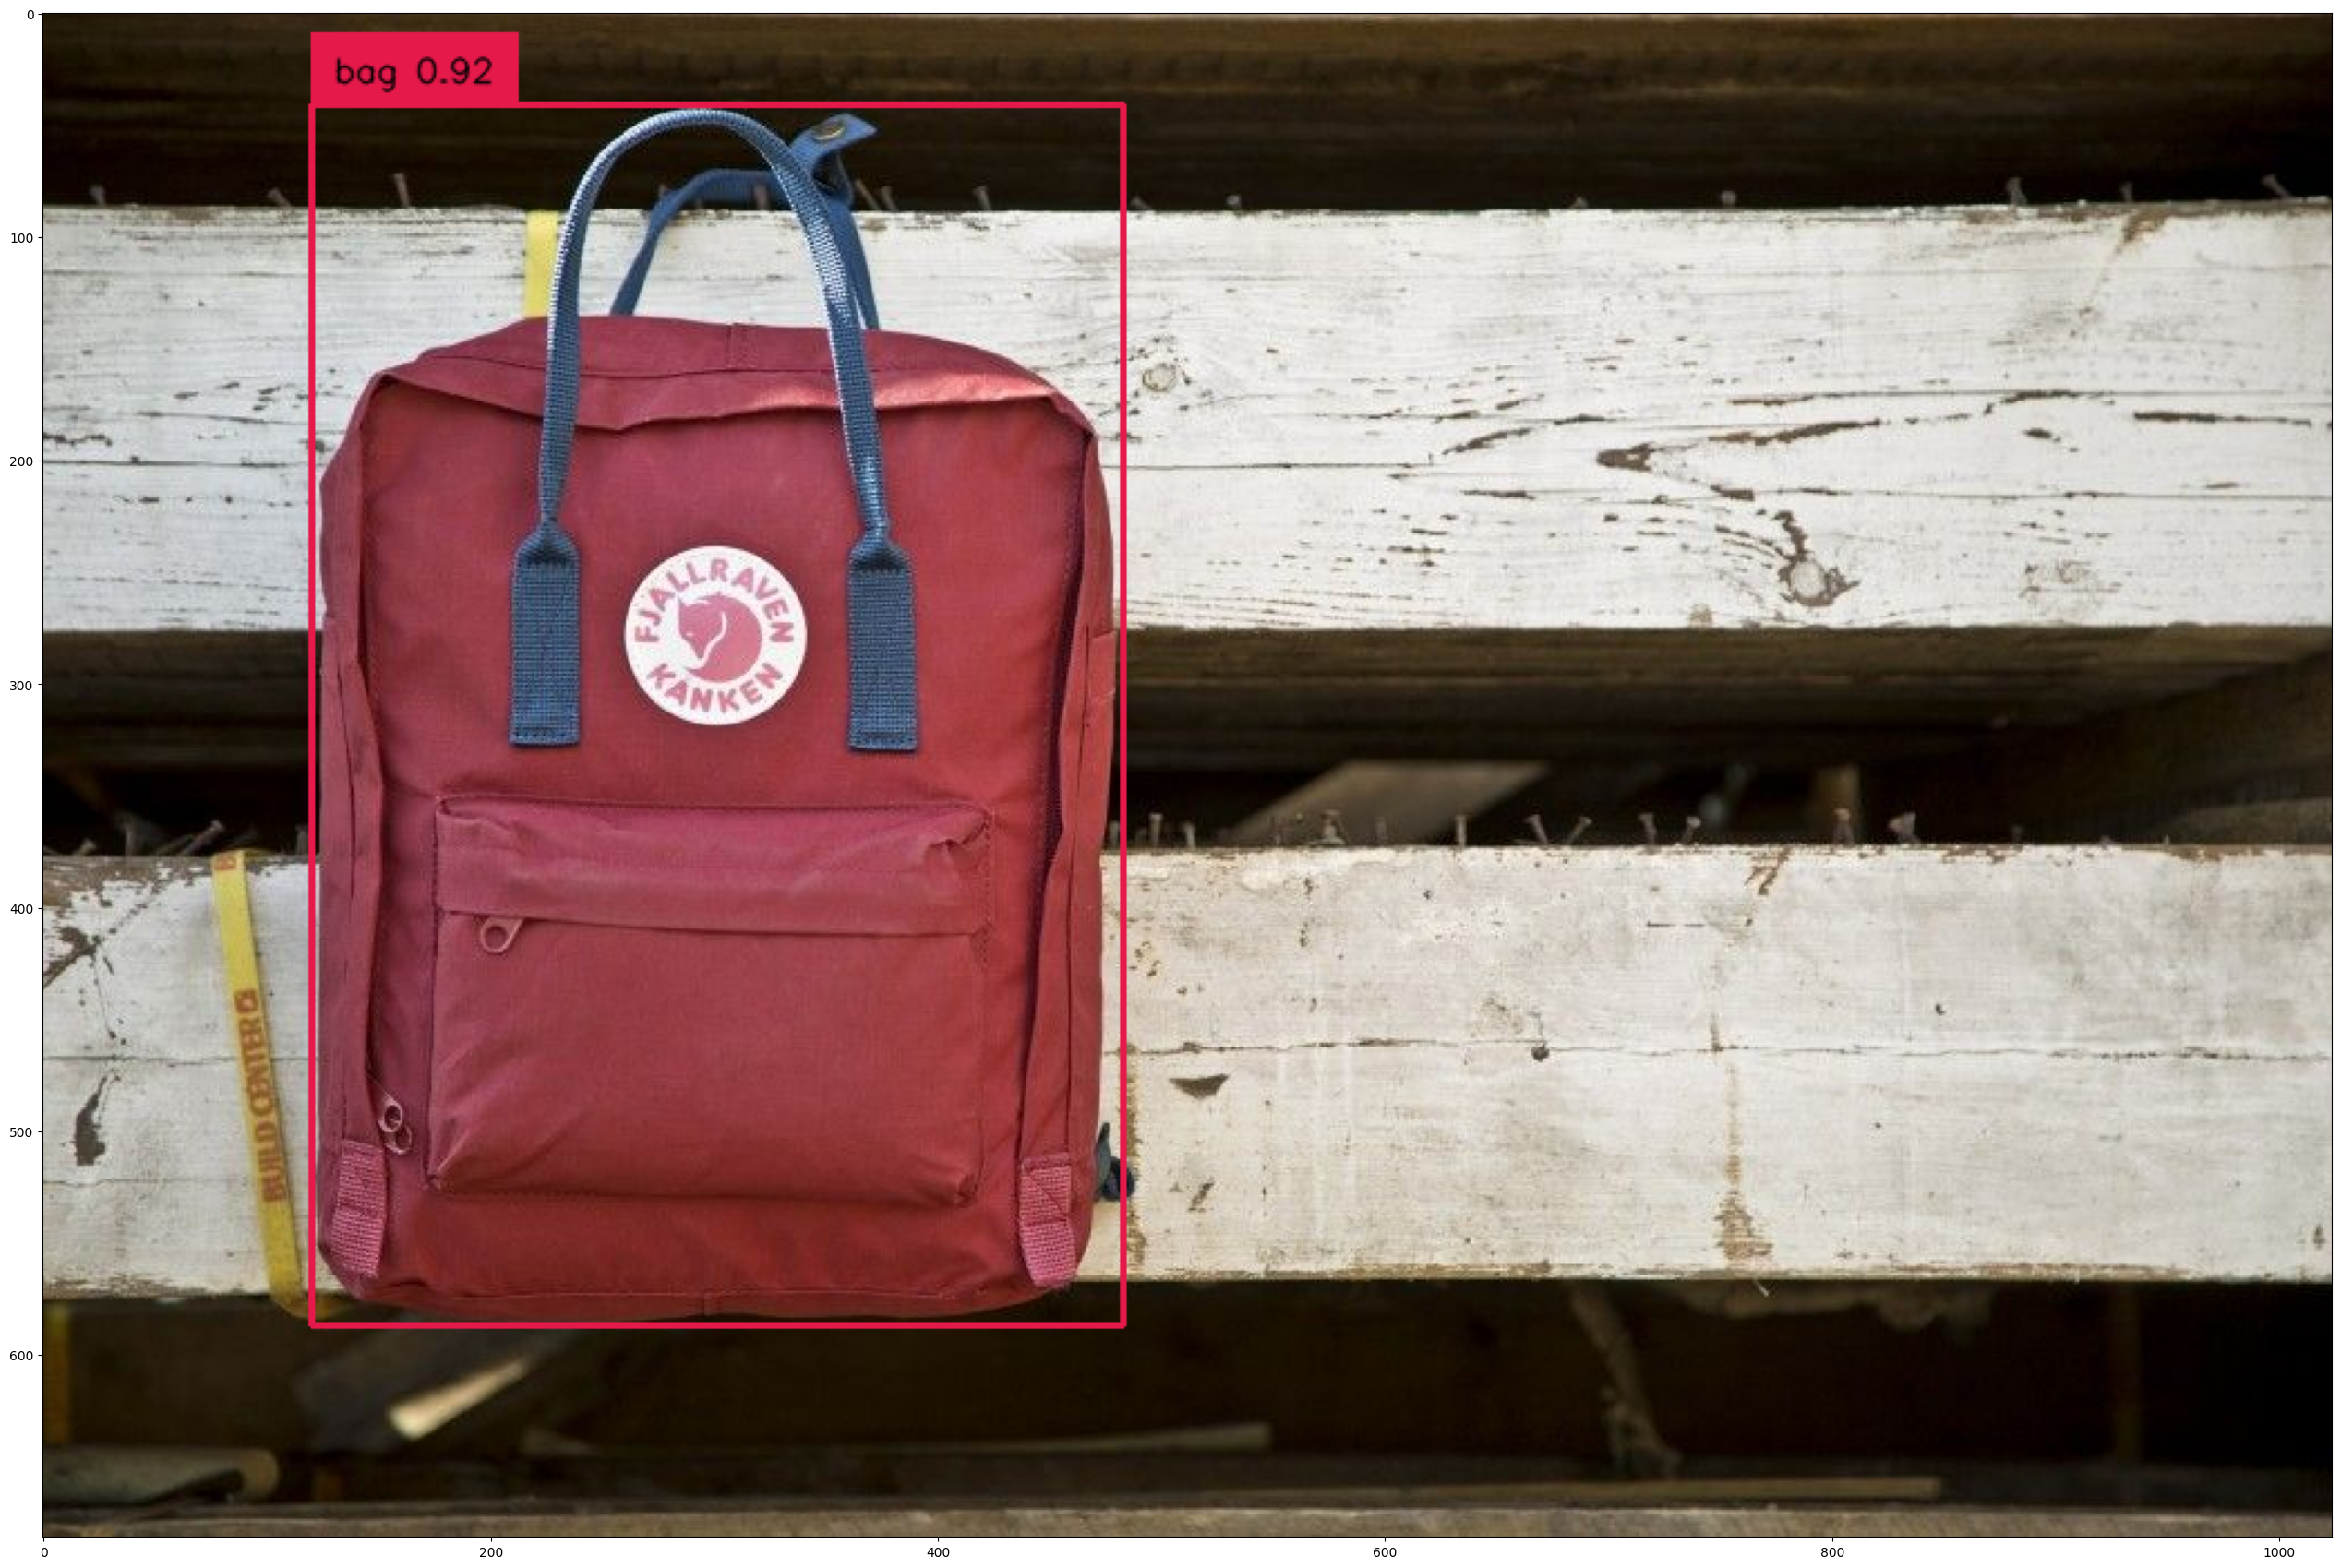

In [ ]:
import cv2

import supervision as sv


image = cv2.imread(SOURCE_IMAGE_PATH)
caption = ", ".join(CLASSES)

detections, labels = model.predict_with_caption(
    image=image,
    caption=caption,
    box_threshold=BOX_TRESHOLD,
    text_threshold=TEXT_TRESHOLD
)

box_annotator = sv.BoxAnnotator()
labels = [
    f"{label} {confidence:0.2f}"
    for label, (_, confidence, class_id, _)
    in zip(labels, detections)]
annotated_frame = box_annotator.annotate(scene=image.copy(), detections=detections, labels=labels)


%matplotlib inline
sv.plot_image(annotated_frame, (32, 32))

In [ ]:
from typing import List

def enhance_class_name(class_names: List[str]) -> List[str]:
    return [
        f"all {class_name}s"
        for class_name
        in class_names
    ]

In [ ]:
import os
import cv2

def list_image_files(directory: str) -> List[str]:
    image_extensions = [".jpeg", ".jpg", ".png", ".bmp", ".gif"]
    image_files = [f for f in os.listdir(directory) if os.path.splitext(f)[1].lower() in image_extensions]
    return image_files


def save_voc_xml(xml_string: str, file_path: str) -> None:
    with open(file_path, 'w') as f:
        f.write(xml_string)


def image_name_to_xml_name(image_name: str) -> str:
    base_name, _ = os.path.splitext(image_name)
    xml_name = f"{base_name}.xml"
    return xml_name


In [ ]:
SOURCE_DIRECTORY_PATH = '/content/lordbertrum/backpacks-bags-cases'#os.path.join(HOME, "data")
CLASSES = ['bag']
BOX_TRESHOLD = 0.25
TEXT_TRESHOLD = 0.25

In [ ]:
from os import listdir

for image_name in list_image_files(SOURCE_DIRECTORY_PATH):
    image_path = os.path.join(SOURCE_DIRECTORY_PATH, image_name)
    image = cv2.imread(image_path)
    height, width, depth = image.shape
    xml_name = image_name_to_xml_name(image_name=image_name)
    xml_path = os.path.join(SOURCE_DIRECTORY_PATH, xml_name)

    detections = model.predict_with_classes(
        image=image,
        classes=enhance_class_name(class_names=CLASSES),
        box_threshold=BOX_TRESHOLD,
        text_threshold=TEXT_TRESHOLD
    )

    # drop potential detections with phrase that is not part of CLASSES set
    detections = detections[detections.class_id != None]
    # drop potential detections with area close to area of whole image
    detections = detections[(detections.area / (height * width)) < 0.9 ]
    # drop potential double detections
    # detections = detections.with_nms()

    xml_string = sv.detections_to_voc_xml(
        detections=detections,
        classes=CLASSES,
        filename=image_name,
        width=width,
        height=height,
        depth=depth
    )

    save_voc_xml(xml_string=xml_string, file_path=xml_path)

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [ ]:
!zip -r /content/MoreBags /content/lordbertrum/MoreBags

  adding: content/lordbertrum/MoreBags/ (stored 0%)
  adding: content/lordbertrum/MoreBags/Bag (278).jpg (deflated 0%)
  adding: content/lordbertrum/MoreBags/Bag (223).xml (deflated 57%)
  adding: content/lordbertrum/MoreBags/Bag (288).xml (deflated 57%)
  adding: content/lordbertrum/MoreBags/Bag (66).xml (deflated 47%)
  adding: content/lordbertrum/MoreBags/Bag (67).xml (deflated 47%)
  adding: content/lordbertrum/MoreBags/Bag (260).xml (deflated 46%)
  adding: content/lordbertrum/MoreBags/Bag (280).jpg (deflated 2%)
  adding: content/lordbertrum/MoreBags/Bag (107).xml (deflated 46%)
  adding: content/lordbertrum/MoreBags/Bag (244).jpg (deflated 0%)
  adding: content/lordbertrum/MoreBags/Bag (272).xml (deflated 63%)
  adding: content/lordbertrum/MoreBags/Bag (72).jpg (deflated 1%)
  adding: content/lordbertrum/MoreBags/Bag (165).xml (deflated 46%)
  adding: content/lordbertrum/MoreBags/Bag (215).jpg (deflated 1%)
  adding: content/lordbertrum/MoreBags/Bag (203).xml (deflated 47%)
  ad

In [ ]:
!rm -rf /content/data

## 🏆 Congratulations